<a href="https://colab.research.google.com/github/bscholesboogie/RStudio_Test/blob/master/Credit_Card_Fraud_%26_Anomaly_Detection_DWS_120821.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Credit Card Fraud/Anomaly Detection (DecisionTrees, XGBoost, CNNs, and ANNs)

##### About the Data:

The datasets contains transactions made by credit cards in September 2013 by european cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

##### Objective:

To develop a classification model that can identify, with high certainty, whether a transaction is fradulent or not given the current dataset.

### 1. Import Libraries:

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

### 2. Import Data:

In [2]:
df = pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


### 3. Exploratory Data Analysis:

In [3]:
df.shape

(25838, 31)

In [7]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [8]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,45646.000000,45646.000000,45646.000000,45646.000000,45646.000000,45646.000000,45645.000000,45645.000000,45645.000000,45645.000000,45645.000000,45645.000000,45645.000000,45645.000000,45645.000000,45645.000000,45645.000000,45645.000000,45645.000000,45645.000000,45645.000000,45645.000000,45645.000000,45645.000000,45645.000000,45645.000000,45645.000000,45645.000000,45645.000000,45645.000000,45645.000000
mean,27545.441331,-0.237544,0.028942,0.696718,0.191505,-0.248407,0.098588,-0.117937,0.053331,0.157893,-0.066674,0.392049,-0.388513,0.190240,0.190406,0.112520,-0.012761,0.122303,-0.097736,-0.028032,0.047654,-0.027098,-0.108684,-0.039060,0.009358,0.136697,0.022305,0.005524,0.004641,90.829574,0.003111
std,12907.770469,1.886548,1.613070,1.530553,1.403936,1.414608,1.308548,1.282818,1.210502,1.222268,1.160413,1.127217,1.369284,1.130548,1.148279,0.952296,0.959830,1.137048,0.876052,0.820484,0.706848,0.733323,0.636670,0.572037,0.592176,0.437824,0.502716,0.389241,0.338798,240.298594,0.055690
min,0.000000,-56.407510,-72.715728,-32.965346,-5.172595,-42.147898,-26.160506,-26.548144,-41.484823,-9.283925,-18.271168,-4.049895,-17.769143,-3.844974,-19.214325,-4.152532,-13.563273,-25.162799,-9.498746,-4.932733,-13.694584,-20.262054,-8.593642,-26.751119,-2.836627,-7.495741,-1.438650,-8.567638,-9.617915,0.000000,0.000000
25%,19891.000000,-0.985248,-0.543868,0.222804,-0.714566,-0.853436,-0.638480,-0.600071,-0.148358,-0.589301,-0.540214,-0.422694,-1.073812,-0.567194,-0.281019,-0.447023,-0.496083,-0.355111,-0.572671,-0.523393,-0.164539,-0.232743,-0.529609,-0.179136,-0.322003,-0.128065,-0.329709,-0.063670,-0.006837,7.580000,0.000000
50%,32447.000000,-0.246259,0.088873,0.801638,0.191835,-0.280620,-0.155353,-0.073143,0.054815,0.038334,-0.120734,0.356045,-0.056745,0.128453,0.168087,0.227726,0.057563,0.072874,-0.078118,-0.031193,-0.022586,-0.070241,-0.083448,-0.051304,0.062230,0.175771,-0.067778,0.008425,0.021814,24.990000,0.000000
75%,37571.750000,1.157412,0.739723,1.434911,1.070924,0.287608,0.487645,0.429944,0.324345,0.859738,0.393128,1.181320,0.522825,0.912665,0.719698,0.791440,0.553232,0.554140,0.399730,0.480084,0.170528,0.105614,0.303459,0.077905,0.401392,0.421857,0.302819,0.084017,0.076209,82.600000,0.000000
max,42437.000000,1.960497,18.183626,4.101716,16.491217,34.801666,22.529298,36.677268,20.007208,10.392889,13.198226,12.018913,4.846452,4.465413,7.692209,5.784514,6.098529,9.253526,4.295648,5.228342,17.281859,22.614889,5.805795,17.297845,4.014444,5.525093,3.517346,11.135740,33.847808,7879.420000,1.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45646 entries, 0 to 45645
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    45646 non-null  int64  
 1   V1      45646 non-null  float64
 2   V2      45646 non-null  float64
 3   V3      45646 non-null  float64
 4   V4      45646 non-null  float64
 5   V5      45646 non-null  float64
 6   V6      45645 non-null  float64
 7   V7      45645 non-null  float64
 8   V8      45645 non-null  float64
 9   V9      45645 non-null  float64
 10  V10     45645 non-null  float64
 11  V11     45645 non-null  float64
 12  V12     45645 non-null  float64
 13  V13     45645 non-null  float64
 14  V14     45645 non-null  float64
 15  V15     45645 non-null  float64
 16  V16     45645 non-null  float64
 17  V17     45645 non-null  float64
 18  V18     45645 non-null  float64
 19  V19     45645 non-null  float64
 20  V20     45645 non-null  float64
 21  V21     45645 non-null  float64
 22

In [10]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        1
V7        1
V8        1
V9        1
V10       1
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [11]:
# Since there is at most 1 NaN per column, we replace NaN with zero
df.fillna(0)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45641,42436,-2.481639,-2.439949,0.363642,1.216827,2.572442,-1.264220,-0.443652,0.075853,0.073188,0.097421,-1.339838,-0.596440,-0.692792,0.278758,0.871242,-0.750009,0.282120,-0.317401,1.357643,-0.221691,-0.039426,0.480591,1.779358,-0.756700,-0.161099,0.685617,0.223071,0.139619,0.00,0.0
45642,42436,1.223475,0.014944,0.471312,-0.038410,-0.566793,-0.867970,-0.058213,-0.144080,0.164904,-0.248839,0.363145,0.615128,0.421817,0.206175,1.320600,-0.150154,0.071375,-1.101733,-0.414879,-0.076754,-0.053292,-0.093680,0.106348,0.471407,0.135555,0.968336,-0.065171,0.005184,7.49,0.0
45643,42436,1.258657,0.421016,0.325437,0.684259,-0.292529,-1.052786,0.145228,-0.253567,-0.100521,-0.308072,0.083964,0.702541,1.104821,-0.462648,0.997369,0.437119,-0.055465,-0.407290,-0.204127,-0.026262,-0.278029,-0.757417,0.119613,0.369393,0.246145,0.091553,-0.017156,0.032557,0.89,0.0
45644,42437,-0.500147,1.000770,1.809639,-0.114551,0.333865,-0.577076,1.062325,-0.513050,-0.048285,0.314582,0.369958,0.304582,0.527437,-0.395232,1.013454,-0.431934,-0.274147,-1.039753,-0.462377,0.182763,-0.193814,-0.161410,0.036965,0.400154,-0.802486,-0.076097,-0.214317,-0.229160,2.69,0.0


In [12]:
df.Class.value_counts()
# 0 = Valid
# 1 = Fraud

0.0    45503
1.0      142
Name: Class, dtype: int64

In [13]:
# Later, we will need an estimate of the fraction of fraudulent
# transactions (called "contamination")
cntmn = 142/45503
print(cntmn)

0.003120673362195899


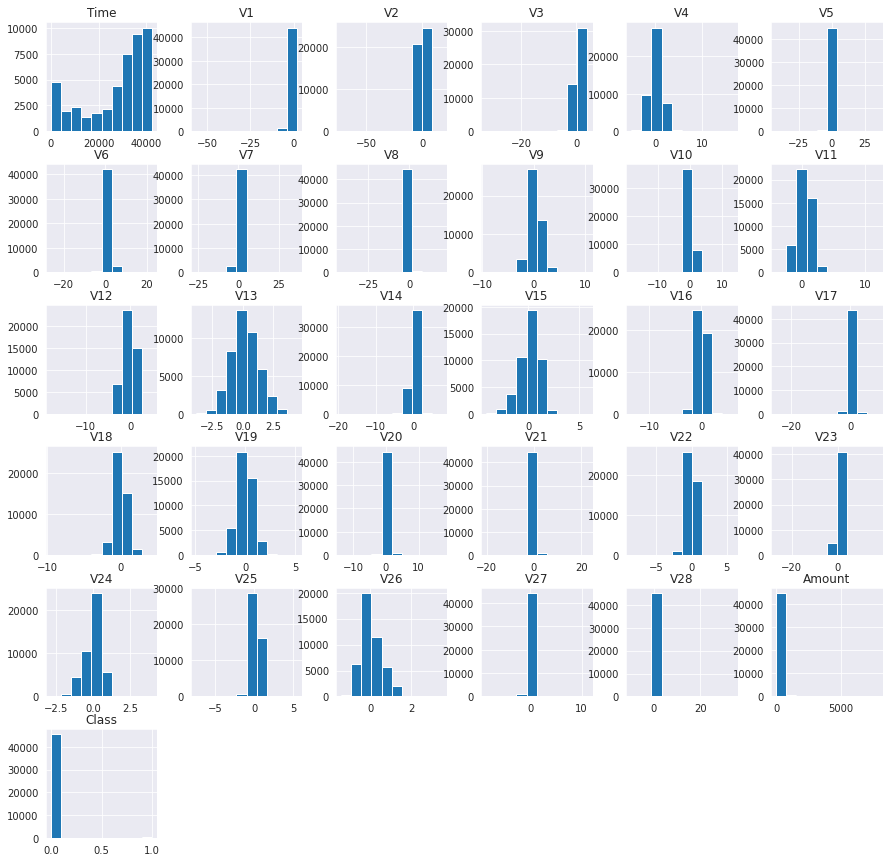

In [14]:
df.hist(figsize=(15,15));

Most of the data is already standardized ($\mu = 0, \sigma = 1$), so we'll standardize the remaining columns except for the "Class" column, which contains the labels.

In [15]:
from sklearn.preprocessing import StandardScaler

# Let's standardize (mu = 0, sigma = 1) the amount column prior to PCA analysis
scale = StandardScaler()
df[["Time_Stdz", "Amt_Stdz"]] = scale.fit_transform(df[["Time", "Amount"]])

In [16]:
from sklearn.decomposition import PCA

# Drop the unstandardized "Amount" and "Time" columns,
# as well as the label column, "Class"
df2 = df.drop(["Time", "Amount", "Class"], axis=1)
pca = PCA()
pca.fit(df2)

ValueError: ignored

In [12]:
# Return the explained variance ratio by factor
pca.explained_variance_ratio_

array([0.12088206, 0.09654333, 0.0792491 , 0.06548459, 0.06090455,
       0.05492346, 0.04985652, 0.04372582, 0.03692046, 0.03686609,
       0.03580899, 0.03078275, 0.03029957, 0.02844072, 0.02659639,
       0.02346401, 0.02235878, 0.02173401, 0.02118511, 0.02007162,
       0.01752752, 0.01655258, 0.01309067, 0.01194615, 0.01119211,
       0.00718657, 0.00658241, 0.0049962 , 0.00333107, 0.00149677])

Text(0, 0.5, 'Cumulative Explained Variance')

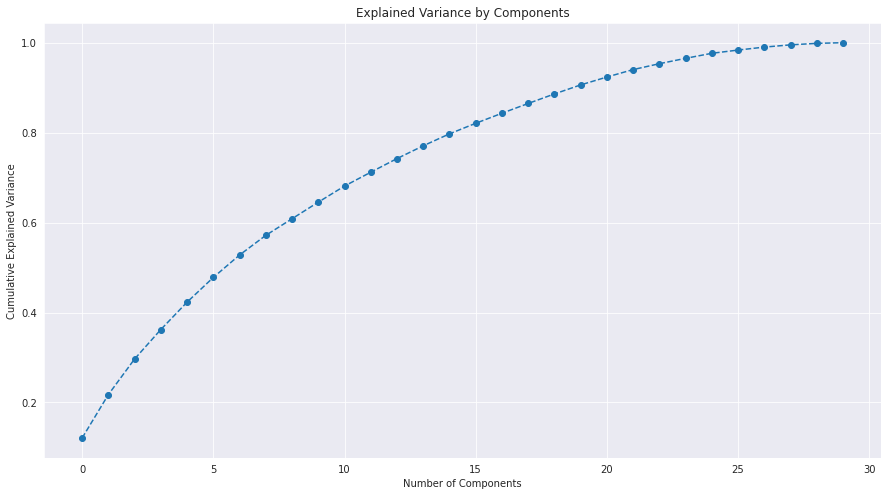

In [13]:
plt.figure(figsize=(15,8))
plt.plot(pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title("Explained Variance by Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")

Cumulative variance shows few if any superfluous columns. Below, we'll go ahead and plot the elbow to see if there is an obvious reduction somewhere in the marginal explained variances.

In [14]:
# Reformat and view results
loadings = pd.DataFrame(pca.components_.T,
columns=['PC%s' % _ for _ in range(len(df2.columns))], index=df2.columns)
print(loadings)

                PC0       PC1       PC2  ...      PC27      PC28      PC29
V1        -0.956469  0.241162 -0.062487  ...  0.005945  0.003164 -0.089386
V2        -0.153603 -0.822955  0.229013  ...  0.018819  0.010511 -0.249203
V3        -0.011369 -0.206242 -0.870111  ...  0.011544  0.007219 -0.108803
V4         0.021590  0.039213 -0.092210  ... -0.003248 -0.001577  0.054153
V5        -0.065609 -0.157595  0.114357  ...  0.015223  0.008035 -0.218133
V6         0.031655  0.079503 -0.030510  ... -0.009191 -0.004922  0.126646
V7         0.040503  0.126950  0.050844  ... -0.020548 -0.011457  0.252480
V8        -0.009168 -0.030673 -0.017572  ...  0.005729  0.003221 -0.068046
V9        -0.003559 -0.010443 -0.003617  ...  0.002653  0.001460 -0.031942
V10       -0.009604 -0.021380  0.007117  ...  0.005554  0.002916 -0.073864
V11        0.006892 -0.009012 -0.063497  ...  0.003226  0.002485 -0.000587
V12       -0.004032  0.002565  0.030196  ... -0.001046 -0.000949 -0.007293
V13        0.002140 -0.00

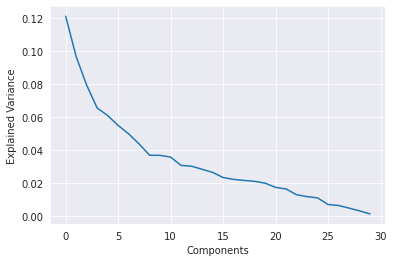

In [15]:
plt.plot(pca.explained_variance_ratio_)
plt.ylabel('Explained Variance')
plt.xlabel('Components')
plt.show()

The marginal variance explained by component isn't strictly smooth, but neither is it obviously kinked at some number of components. It looks as though we'll need all of our columns to carry out our anomaly detection.

In [ ]:
#plt.figure(figsize=(20,10))
#sns.pairplot(df[["Time","V1", "Amount"]])

In [ ]:
#plt.figure(figsize=(20,5))
#sns.scatterplot(df["Time"], df["V1"], hue=df["Class"])

In [ ]:
#plt.figure(figsize=(20,5))
#sns.scatterplot(df["V1"], df["V2"], hue=df["Class"])

### 4. Preprocessing:

In [16]:
df2.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Time_Stdz,Amt_Stdz
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,-1.996583,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-1.996583,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,-1.996562,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,-1.996562,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-1.996541,-0.073403


In [17]:
# Rejoin the labels in the "Class" column
df3 = pd.concat([df2, df["Class"]], axis=1)
df3.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Time_Stdz,Amt_Stdz,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,-1.996583,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-1.996583,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,-1.996562,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,-1.996562,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-1.996541,-0.073403,0


In [18]:
#import pandas as pd
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()

# Below we construct our X and y variables. Since we have many fewer than
# 1M samples, we'll create our training and test samples from the whole set

X = df3.iloc[:, :-1]
y = df3.Class.values.ravel()

#X_scaled = scaler.fit_transform(X)

###  5. Split Training and Testing Data:

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=999)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(213605, 30)
(71202, 30)
(213605,)
(71202,)


### 6. Model Development

### Classification Methods (Supervised)

Some terminology related to reporting as it pertains to Classification Methods:

**Precision** is the number of correctly identified members of a class divided by all the times the model predicted that class. Succinctly,

**Precision** = $((True Positive)/(True Positive + False Positive))$

**Recall** is the number of members of a class that the classifier identified correctly divided by the total number of members in that class. Again succinctly,

**Recall** = $((True Positive)/(True Positive + False Negative))$

**F1** score is less intuitive because it combines precision and recall into one metric. If precision and recall are both high, F1 will be high. If they are both low, F1 will be low. If one is high and the other low, F1 will be low. F1 is one way to tell whether the classifier is actually good at identifying members of a class, or if it is taking shortcuts like assigning everything to one big class.

#### Random Forests Classification:

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71080
           1       0.96      0.87      0.91       122

    accuracy                           1.00     71202
   macro avg       0.98      0.93      0.96     71202
weighted avg       1.00      1.00      1.00     71202



#### XGBoost Classification:

In [22]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71080
           1       0.95      0.89      0.92       122

    accuracy                           1.00     71202
   macro avg       0.97      0.94      0.96     71202
weighted avg       1.00      1.00      1.00     71202



The performance of both Classification methods would be best described as *fair*. Not bad, but we expect a score much closer to 1.0 from supervised learning methods.

### Anomaly Detection (Unsupervised)

The objective of unsupervised anomaly detection is not so much designating a sample as anomalous as it is to flag those samples that merit further investigation.

#### Mahalanobis Distance

In [24]:
from sklearn.covariance import EllipticEnvelope

# Begin by defining the elliptic envelope
el = EllipticEnvelope(store_precision=True, # default
                                 assume_centered=True, # standardized data
                                 support_fraction=None, # default
                                 contamination=cntmn, # our estimate above
                                 random_state=9999 # for reproducibility
)

el.fit(X_train) # Fit the training set

/usr/local/lib/python3.7/dist-packages/sklearn/covariance/_robust_covariance.py:189: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-203.496645576908833 > -312.790619519540144). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/covariance/_robust_covariance.py:189: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-287.376647849863673 > -289.135163689382580). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/covariance/_robust_covariance.py:189: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-250.809978013990701 > -305.467120977077343). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning,
/usr/local

EllipticEnvelope(assume_centered=True, contamination=0.0017304750013189597,
                 random_state=9999)

In [25]:
# Generate a corresponding list of predicted anomalies
md_anom = el.predict(X_train)

In [26]:
from scipy.stats.stats import pearsonr

# Compare predicted anomalies to the corresponding labels
# by correlation
print(pearsonr(md_anom, y_train))

(-0.5153767667824924, 0.0)


### Machine Learning Methods

#### Artificial Neural Network using Keras:

In [1]:
from tensorflow import keras
print(keras.__version__)

2.7.0


In [2]:
model = keras.Sequential(
    [
        keras.layers.Dense(32, activation="relu", input_shape=(X_train.shape[-1],)),
        keras.layers.Dense(128, activation="relu"),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(256, activation="relu"),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(1, activation="sigmoid"),
    ]
)
model.summary()

NameError: ignored

In [ ]:
model.compile(
    optimizer=keras.optimizers.Adam(1e-2), 
    loss="binary_crossentropy", 
    metrics=["accuracy"]
)

In [ ]:
history = model.fit(
                    X_train,
                    y_train,
                    batch_size=2048,
                    epochs=30,
                    verbose=2,
                    validation_split = 0.2)

In [ ]:
history.history.keys()

In [ ]:
results = pd.DataFrame(history.history)
results.head(5)

In [ ]:
plt.figure(figsize = (15,4))

plt.subplot(121)
plt.plot(results.index, results.accuracy, label="Training Accuracy", linewidth=4)
plt.plot(results.index, results.val_accuracy, label="Validation Accuracy", linewidth=4)
plt.xlabel("Epochs", fontsize=15)
plt.ylabel("Accuracy Score", fontsize=15)
plt.title("Training and Validation Accuracy over Epochs" , fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.subplot(122)
plt.plot(results.index, results.loss, label="Training Loss", linewidth=4)
plt.plot(results.index, results.val_loss, label="Validation Loss", linewidth=4)
plt.xlabel("Epochs", fontsize=15)
plt.ylabel("Accuracy Score", fontsize=15)
plt.title("Training and Validation Loss over Epochs", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

#### Artificial Neural Network using Keras with Metrics & Weights:

In [ ]:
counts = np.bincount(y_train)
wt_0 = 1.0 / counts[0]
wt_1 = 1.0 / counts[1]

print(wt_0)
print(wt_1)

In [ ]:
model_2 = keras.Sequential(
    [
        keras.layers.Dense(
            256, activation="relu", input_shape=(X_train.shape[-1],)
        ),
        keras.layers.Dense(256, activation="relu"),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(256, activation="relu"),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(1, activation="sigmoid"),
    ]
)
model_2.summary()

In [ ]:
metrics = [
    keras.metrics.Precision(name="precision"),
#     keras.metrics.Recall(name="recall"),
#     keras.metrics.Accuracy(name="accuracy")
]

model_2.compile(
    optimizer=keras.optimizers.Adam(1e-2), loss="binary_crossentropy", metrics=metrics
)



history = model_2.fit(
                    X_train,
                    y_train,
                    batch_size=2048,
                    epochs=30,
                    verbose=2,
                    validation_split = 0.2,
                    class_weight = {0: wt_0, 1: wt_1}
)

In [ ]:
score = model_2.evaluate(X_test, y_test)


#### Convolutional Neural Network using Keras with Metrics & Weights:

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [ ]:
X_train.shape[-1]

In [ ]:
X_test_d = np.expand_dims(X_test, -1)
X_train_d  = np.expand_dims(X_train, -1)

In [ ]:
X_test_d

In [ ]:
model_3 = Sequential()
model_3.add(Conv1D(32, 2, activation='relu', input_shape=X_test_d[0].shape))
model_3.add(BatchNormalization())
model_3.add(Dropout(0.1))

model_3.add(Conv1D(64, 2, activation='relu'))
model_3.add(BatchNormalization())
model_3.add(Dropout(0.2))

model_3.add(Conv1D(128, 2, activation='relu'))
model_3.add(BatchNormalization())
model_3.add(Dropout(0.3))

model_3.add(Flatten())
model_3.add(Dropout(0.4))
model_3.add(Dense(512, activation='relu'))
model_3.add(Dropout(0.5))

model_3.add(Dense(1, activation='sigmoid'))

In [ ]:
model_3.summary()

In [ ]:
METRICS = [
    'accuracy',
    keras.metrics.Precision(name='precision'),
    keras.metrics.Recall(name='recall')
]

model_3.compile(optimizer='adam', loss='binary_crossentropy', metrics=METRICS)
history = model_3.fit(X_train_d, y_train, 
              validation_split=0.2,
              batch_size=16, 
              epochs=20, 
             )

In [ ]:
score = model.evaluate(X_test, y_test)
score

In [ ]:
plt.figure(figsize=(12, 16))

plt.subplot(4, 2, 1)
plt.plot(history.history['loss'], label='Train Loss', linewidth=4)
plt.plot(history.history['val_loss'], label='Val Loss', linewidth=4)
plt.legend()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.axvline(x=18, color="red",linestyle='dashed', linewidth=1)


plt.subplot(4, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy', linewidth=4)
plt.plot(history.history['val_accuracy'], label='Val Accuracy', linewidth=4)
plt.legend()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.axvline(x=18, color="red",linestyle='dashed', linewidth=1)


plt.subplot(4, 2, 3)
plt.plot(history.history['precision'], label='Train Precision', linewidth=4)
plt.plot(history.history['val_precision'], label='Val Precision', linewidth=4)
plt.legend()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.axvline(x=17.5, color="red",linestyle='dashed', linewidth=1)

plt.subplot(4, 2, 4)
plt.plot(history.history['recall'], label='Train Recall', linewidth=4)
plt.plot(history.history['val_recall'], label='Val Recall', linewidth=4)
plt.legend()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.axvline(x=17.5, color="red",linestyle='dashed', linewidth=1)
